# Introduction
How often do you use the RFM analysis in your marketing? The RFM analysis is a great tool for marketers to figure out which customers are most valuable and how they should be marketed to. It's also a great way to find new prospects that might not have been found otherwise. Here we'll explain into each of the four groups: Retention, Frequency, Monetary Value and Referral and explain what they mean and why you want them as customers!

<font color = 'blue'>
Content: 

1. [Customer Segmentation With RFM](#1)
1. [Business Problem](#2)
    * [Dataset Story](#3)
    * [Variables](#4)
1. [Libraries](5)
1. [Load and Check Data](#6)
    * [Data Preprocessing](#7)
    * [Outlier Observations](#8)
1. [Exploratory Data Analysis](#9)
    * [Categorical Variables](#10)
    * [Numerical Variables](#11)
1. [Customer Segmentation With RFM](#12)
    * [Preparation of RFM Metrics](#13)
    * [Generating RFM Scores](#14)
    * [Segmenting Customers Based on RFM Scores](#15)
    * [Visualization of RFM Segments](#16)
1. [References](#17)



<a id = "1"></a><br>
# Customer Segmentation With RFM
## WHAT IS RFM?

The RFM method is a tool for assessing consumer value. It's frequently utilized in database marketing and direct marketing, as well as retail and professional services.

RFM stands for the three dimensions:

* **Recency:** How recently did the customer purchase?
* **Frequency:** How often do they purchase?
* **Monetary Value:** How much do they spend?

<a id = "2"></a><br>
# Problem
An e-commerce company wants to segment its customers and determine marketing strategies according to these segments. For example, it is desired to organize different campaigns for new customers and different campaigns in order to retain customers that are very profitable for the company.

<a id = "3"></a><br>
## Dataset Story
* The dataset includes sales between 01/12/2009 - 09/12/2011.
* The product catalog of this company includes souvenirs.
* The vast majority of the company's customers are corporate customers.

<a id = "4"></a><br>
## Variables
* **InvoiceNo:** Invoice number. The unique number of each transaction, namely the invoice. Aborted operation if it starts with C.
* **StockCode:** Product code. Unique number for each product.
* **Description**: Product name
* **Quantity**: Number of products. It expresses how many of the products on the invoices have been sold.
* **InvoiceDate**: Invoice date and time.
* **UnitPrice**: Product price (in GBP)
* **CustomerID:** Unique customer number
* **Country:** The country where the customer lives.

<a id = "5"></a><br>
# Libraries

In [1]:

# installlation required
!pip install openpyxl # for excel file

# libraries
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # treemap visualization
import warnings 
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

     |████████████████████████████████| 244 kB 812 kB/s 
/kaggle/input/online-retail-ii-data-set-from-ml-repository/Year 2010-2011.csv
/kaggle/input/online-retail-ii-data-set-from-ml-repository/Year 2009-2010.csv
/kaggle/input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx


<a id = "6"></a><br>
# Load and Check Data

In [2]:
df_2010_2011 = pd.read_excel("../input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx", sheet_name = "Year 2010-2011")

#online_retail = pd.read_csv("/kaggle/input/online-retail-ii-data-set-from-ml-repository/Year 2010-2011.csv", sep=";")
df = df_2010_2011.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Let's look at the data first.

<a id = "7"></a><br>
## Data Pre-processing

In [3]:
def check_df(dataframe):
    print("################ Shape ####################")
    print(dataframe.shape)
    print("############### Columns ###################")
    print(dataframe.columns)
    print("############### Types #####################")
    print(dataframe.dtypes)
    print("############### Head ######################")
    print(dataframe.head())
    print("############### Tail ######################")
    print(dataframe.tail())
    print("############### Describe ###################")
    print(dataframe.describe().T)

check_df(df)

################ Shape ####################
(541910, 8)
############### Columns ###################
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
############### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
############### Head ######################
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   


<a id = "8"></a><br>
# Outlier Observations

In [4]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "Price")

In [5]:
# NA values
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

Let's remove null values in the dataframe

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

We exclude canceled and returned orders from the data set.

In [7]:
# We exclude canceled and returned orders from the data set.
df = df[~df["Invoice"].str.contains("C", na=False)]
df.shape

(397925, 8)

<a id = "9"></a><br>
# Exploratory Data Analysis

<a id = "10"></a><br>
## Categorical Variable Analysis

In [8]:
cat_cols = [col for col in df.columns if df[col].dtypes =="O"]
cat_but_car = [col for col in df.columns if df[col].nunique() > 100 and df[col].dtypes == "O"]
cat_cols = [col for col in cat_cols if col not in cat_but_car]
cat_cols

['Country']

The dataset has only "Country" variable.

                      Country      Ratio
United Kingdom         354345  89.048187
Germany                  9042   2.272287
France                   8343   2.096626
EIRE                     7238   1.818936
Spain                    2485   0.624490
Netherlands              2363   0.593830
Belgium                  2031   0.510398
Switzerland              1842   0.462901
Portugal                 1462   0.367406
Australia                1185   0.297795
Norway                   1072   0.269397
Italy                     758   0.190488
Channel Islands           748   0.187975
Finland                   685   0.172143
Cyprus                    614   0.154300
Sweden                    451   0.113338
Austria                   398   0.100019
Denmark                   380   0.095495
Poland                    330   0.082930
Japan                     321   0.080668
Israel                    248   0.062323
Unspecified               244   0.061318
Singapore                 222   0.055789
Iceland         

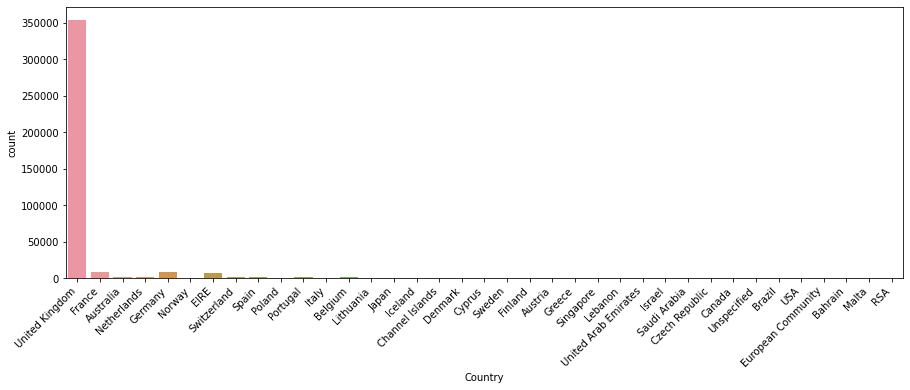

In [9]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        fig_dims = (15, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(rotation = 45, ha = 'right')
        plt.show()

cat_summary(df, "Country", plot=True)


As we can see above, approximately United Kingdom Ratio is %90.02.  Therefore, we only analyze the UK in our study.

<a id = "11"></a><br>
## Numerical Variable Analysis

In comprehension structure below, we indicate that fetch other than "Customer ID". 

In [10]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Customer ID"]
num_cols

['Quantity', 'InvoiceDate', 'Price']

count    397925.000000
mean         11.700748
std          24.126162
min           1.000000
5%            1.000000
10%           1.000000
20%           2.000000
30%           2.000000
40%           4.000000
50%           6.000000
60%           8.000000
70%          12.000000
80%          12.000000
90%          24.000000
95%          36.000000
99%         120.000000
max         253.000000
Name: Quantity, dtype: float64


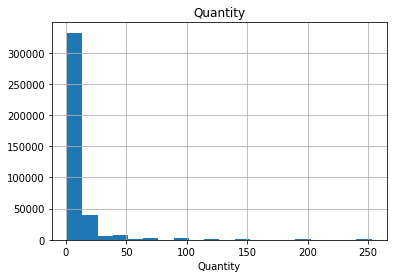

count                  397925
unique                  17286
top       2011-11-14 15:27:00
freq                      542
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object


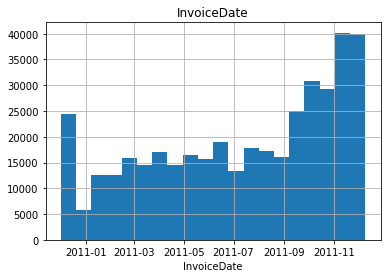

count    397925.000000
mean          2.902793
std           3.336789
min           0.000000
5%            0.420000
10%           0.550000
20%           0.850000
30%           1.250000
40%           1.650000
50%           1.950000
60%           2.100000
70%           2.950000
80%           4.150000
90%           6.350000
95%           8.500000
99%          14.950000
max          44.715000
Name: Price, dtype: float64


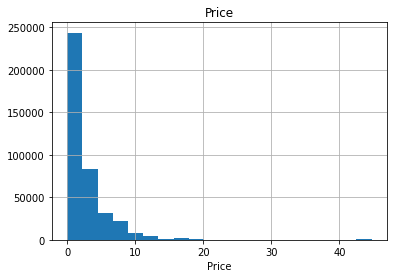

In [11]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)


In [12]:
# number of unique products
df["StockCode"].nunique()

3665

How many sales for a specific product?

In [13]:
df_product = df.groupby("Description").agg({"Quantity":"count"})
df_product.reset_index(inplace=True)
df_product

,Description,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,39
1,50'S CHRISTMAS GIFT BAG LARGE,109
2,DOLLY GIRL BEAKER,138
3,I LOVE LONDON MINI BACKPACK,70
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3872,ZINC T-LIGHT HOLDER STARS SMALL,238
3873,ZINC TOP 2 DOOR WOODEN SHELF,9
3874,ZINC WILLIE WINKIE CANDLE STICK,192
3875,ZINC WIRE KITCHEN ORGANISER,12


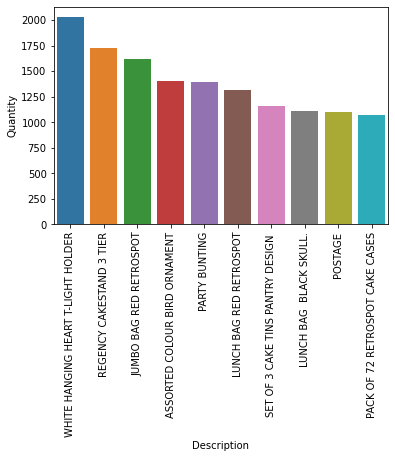

In [14]:
# top 10 selling products
top_pr= df_product.sort_values(by="Quantity",ascending=False).head(10)

sns.barplot(x="Description", y="Quantity",data=top_pr)
plt.xticks(rotation=90)
plt.show()

In [15]:
# total price per invoice
df["TotalPrice"] = df["Price"] * df["Quantity"]

<a id = "12"></a><br>
# Customer Segmentation With RFM

<a id = "13"></a><br>
# Preparation of RFM Metrics

* **recency**: the difference between today and the customer's last purchase date, in days.
* **frequency**: customer's shopping frequency.
* **monetary**: total money paid by the customer.

In [16]:
# Determining the analysis date for the recency account
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"].max()
today_date = dt.datetime(2011, 12, 11)

In [17]:
# generating rfm metrics
rfm = df.groupby("Customer ID").agg({"InvoiceDate": lambda InvıiceDate: (today_date- InvıiceDate.max()).days,
                                    "Invoice": lambda Invoice: Invoice.nunique(),
                                    "TotalPrice": lambda TotalPrice: TotalPrice.sum()})

rfm.columns = ["recency","frequency","monetary"]
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4339.0,93.041484,100.007757,1.0,18.00,51.00,142.500,374.0
frequency,4339.0,4.271952,7.705493,1.0,1.00,2.00,5.000,210.0
monetary,4339.0,1876.869003,7504.531226,0.0,302.52,663.65,1630.445,262302.2


<a id = "14"></a><br>
# Generating RFM Scores

In [18]:
# total money can't be 0. So, if there is any, we remove them.

rfm = rfm[rfm["monetary"] > 0]
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,93.059474,100.012264,1.00,18.00,51.00,142.7500,374.0
frequency,4338.0,4.272706,7.706221,1.00,1.00,2.00,5.0000,210.0
monetary,4338.0,1877.301661,7505.342229,3.75,302.61,663.73,1631.1075,262302.2


In [19]:
# recency_score
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
# frequency_score
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
# monetary_score
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

# RFM Score
rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))
rfm.head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.0,326,1,263.120,1,1,2,11
12347.0,3,7,4310.000,5,5,5,55
12348.0,76,4,1797.240,2,4,4,24
12349.0,19,1,1502.265,4,1,4,41
12350.0,311,1,334.400,1,1,2,11
12352.0,37,8,1799.885,3,5,4,35
12353.0,205,1,89.000,1,1,1,11
12354.0,233,1,1079.400,1,1,4,11
12355.0,215,1,459.400,1,1,2,11


<a id = "15"></a><br>
# Segmenting Customers Based on RFM Scores

Given labels to RFM scores

In [20]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.sort_values(by = "RFM_SCORE", ascending = False)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
17651.0,12,10,3945.000,5,5,5,55,champions
16905.0,6,7,3102.430,5,5,5,55,champions
15271.0,8,15,2507.070,5,5,5,55,champions
14825.0,4,12,2226.910,5,5,5,55,champions
16500.0,5,6,280.575,5,5,2,55,champions
...,...,...,...,...,...,...,...,...
13762.0,219,1,306.720,1,1,2,11,hibernating
13753.0,288,1,741.260,1,1,3,11,hibernating
13751.0,289,1,296.250,1,1,2,11,hibernating


Let's group RFM mean and frequency values according to segments

In [21]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep        53.312500   352   1.161932   352   469.335852   352
at_Risk              153.785835   593   2.878583   593   935.393071   593
cant_loose           132.968254    63   8.380952    63  2633.721587    63
champions              6.361769   633  12.417062   633  6417.597520   633
hibernating          217.605042  1071   1.101774  1071   398.004507  1071
loyal_customers       33.608059   819   6.479853   819  2740.820807   819
need_attention        52.427807   187   2.326203   187   848.090775   187
new_customers          7.428571    42   1.000000    42   312.703571    42
potential_loyalists   17.398760   484   2.010331   484   673.419948   484
promising             23.510638    94   1.000000    94   286.380372    94

<a id = "16"></a><br>
# Visualization of RFM Segments

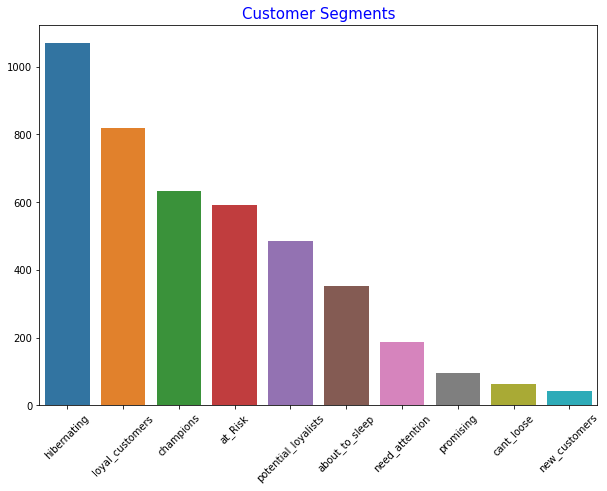

In [22]:
sgm= rfm["segment"].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=sgm.index,y=sgm.values)
plt.xticks(rotation=45)
plt.title('Customer Segments',color = 'blue',fontsize=15)
plt.show()

In [23]:
df_treemap = rfm.groupby('segment').agg('count').reset_index()

In [24]:
df_treemap.head()

,segment,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,about_to_sleep,352,352,352,352,352,352,352
1,at_Risk,593,593,593,593,593,593,593
2,cant_loose,63,63,63,63,63,63,63
3,champions,633,633,633,633,633,633,633
4,hibernating,1071,1071,1071,1071,1071,1071,1071


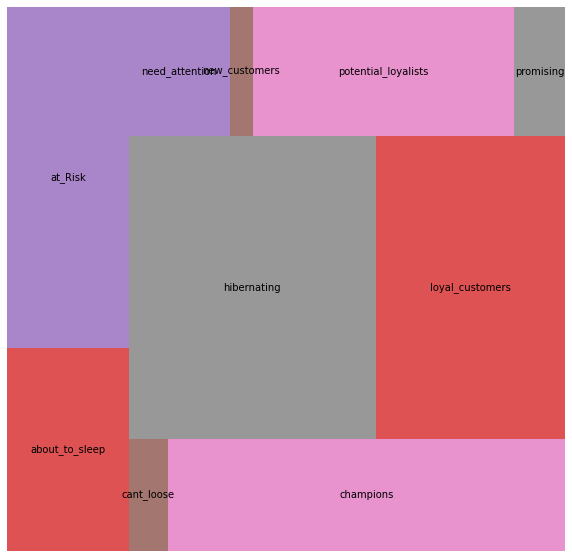

In [25]:
fig, ax = plt.subplots(1, figsize = (10,10))

squarify.plot(sizes=df_treemap['RFM_SCORE'], 
              label=df_treemap['segment'], 
              alpha=.8,
              color=['tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
             )
plt.axis('off')
#plt.savefig('treemap_deneme.png')
plt.show()


<a id = "17"></a><br>
# References
* https://github.com/mvahit
* https://www.veribilimiokulu.com/
* https://www.linkedin.com/in/vahitkeskin/
* https://www.kaggle.com/haticeebraralc/crm-analytics
* https://github.com/hebraralici
* https://en.wikipedia.org/wiki/Customer_lifetime_value
* https://en.wikipedia.org/wiki/RFM_(market_research)